## Model reduction example with MAGNets

Install magnets and import packages

In [1]:
# install packages
#!pip install wntr matplotlib numpy magnets

In [2]:
#import packages
import wntr
import matplotlib.pyplot as plt
import magnets as mg

In [3]:
# define network .inp file
inp = 'networks/Net1.inp'

Create the reduced model

In [4]:
# reduced model
keep_nodes = ['11','12','13','21','22','23','31'] # define nodes to keep

#call model reduction function
wnR = mg.reduction.reduce_model(inp_file = inp, nodes_to_keep = keep_nodes, save_filename = 'networks/Net1_R1')  # wnR is a wntr network model


C:\Users\ps28866\AppData\Local\anaconda3\envs\wntr_env\lib\site-packages\magnets\utils\characteristics.py:161: UserWarning: Some values in list of nodes to keep provided by user do not exist in the model or have already been classified as special nodes. These values have been ignored.
  warnings.warn('Some values in list of nodes to keep provided by user do not exist in the model or have already been classified as special nodes. These values have been ignored.')


Create the original model

In [5]:
wn = wntr.network.WaterNetworkModel(inp)

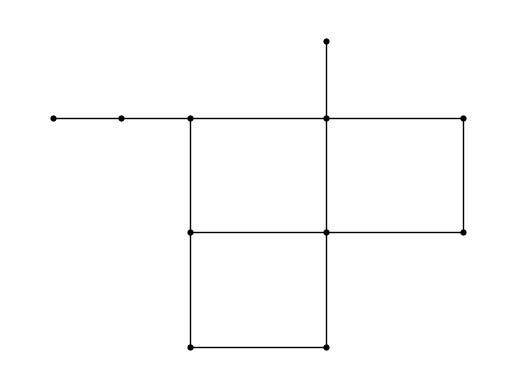

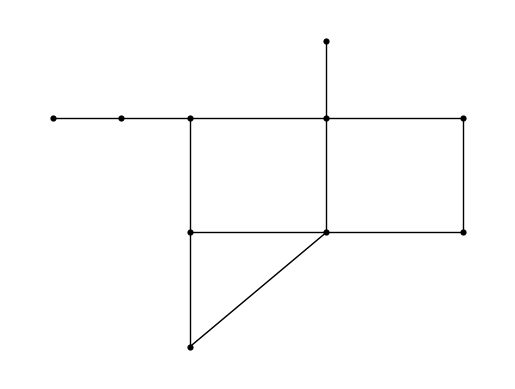

<Axes: >

In [38]:
# plot original model
wntr.graphics.plot_network(wn)
# plot reduced model
wntr.graphics.plot_network(wnR)


In [22]:
# compare pump flow and tank head
#-------------------------------------------------------------------------------------------
# simulate original model
units = 15850.3 # cms to gpm

sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()
results_tank = results.node['pressure']['2']
results_pump = results.link['flowrate']['9']*units

# simulate reduce model model
simR = wntr.sim.EpanetSimulator(wnR)
resultsR = simR.run_sim()
results_tankR = resultsR.node['pressure']['2']
results_pumpR = resultsR.link['flowrate']['9']*units 

time_hours = results_tank.index / 3600  # Convert seconds to hours


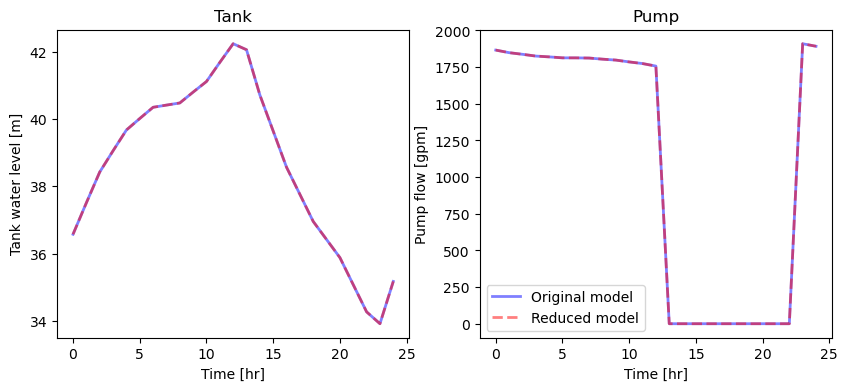

In [23]:
# make plots
#-------------------------------------------------------------------------------------------
fig, ax = plt.subplots(1,2,figsize=(10,4))
# tank
ax[0].plot(time_hours, results_tank, color='blue', linewidth=2, alpha=0.5)
ax[0].plot(time_hours, results_tankR, color='red', linestyle = '--', linewidth=2, alpha=0.5)
ax[0].set_title('Tank')
ax[0].set_xlabel('Time [hr]')
ax[0].set_ylabel('Tank water level [m]')
# pumps
ax[1].plot(time_hours, results_pump, color='blue', linewidth=2, alpha=0.5)
ax[1].plot(time_hours, results_pumpR, color='red', linestyle = '--', linewidth=2, alpha=0.5)
ax[1].set_title('Pump')
ax[1].set_xlabel('Time [hr]')
ax[1].set_ylabel('Pump flow [gpm]')

ax[1].legend(['Original model', 'Reduced model'])

plt.show()

## MAGNets
The user can then call on the **```reduce_model```** function to reduce a hydraulic model of a water distribution network. 

```wn2 = mg.reduction.reduce_model(inp_file, op_pt, nodes_to_keep, max_nodal_degree, save_filename)```


The parameters of the `reduce_model` function are described as follows:

1. `inp_file`: the EPANET-compatible .INP file of the water distribution network model.

2. `op_pt`: (optional, default = 0) the operating point, or the reporting time step of the hydraulic simulation at which the non-linear headloss equations are linearized.

3. `nodes_to_keep`: (optional, default = []) a list of nodes the user wishes to keep in the reduced model.

4. `max_nodal_degree`: (optional, default = None) the maximum nodal degree of nodes being removed from the model. The nodal degree of a node is equal to the number of pipes incident to the node.

5. `save_filename`: (optional, default = None) a user-specified name assigned to the newly generated .INP file of the reduced model.

`wn2` contains the water network model object of the reduced model. A .INP file of the reduced model is also written into the directory that contains the .INP file of the original network.

## Exercise

Use MAGNets to reduce network **Net1**. Try changing providing additional inputs and changing the operating point (```op_pt```) and (```max_nodal_degree```).

In [45]:
'''
op_pt = 0                         # change the operating point: e.g., 5, 10, 15, 20  
max_nodal_degree_ky4 = 1          # change the max nodal degree, e.g., 1, 2, 3, None

#call model reduction
wnR2 = mg.reduction.reduce_model(inp_file = inp,
                                op_pt = op_pt,
                                nodes_to_keep = [],
                                max_nodal_degree = 2,
                                save_filename = 'networks/Net1_R2')  
'''

"\nop_pt = 0                         # change the operating point: e.g., 5, 10, 15, 20  \nmax_nodal_degree_ky4 = 1          # change the max nodal degree, e.g., 1, 2, 3, None\n\n#call model reduction\nwnR2 = mg.reduction.reduce_model(inp_file = inp,\n                                op_pt = op_pt,\n                                nodes_to_keep = [],\n                                max_nodal_degree = 2,\n                                save_filename = 'networks/Net1_R2')  \n"